 # <div align="center">Principal component analysis (sklearn)</div>
---------------------------------------------------------------------
<img src="maxresdefault.jpg" style="width: 400px;"/>

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

 <a id="top"></a> <br>
## Notebook  Content
1. [PCA for Data Visualization](#1)

1. [PCA to Speed-up Machine Learning Algorithms](#2)

<a id="1"></a> <br>
# 1. Principle Component Analysis (PCA) for Data Visualization
For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

[go to top](#top)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import time

# hide warnings
import warnings
def ignore_warn(*args, **kwargs): pass
warnings.warn = ignore_warn

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## PCA Projection to 2D
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [6]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [7]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## Visualize 2D Projection
This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

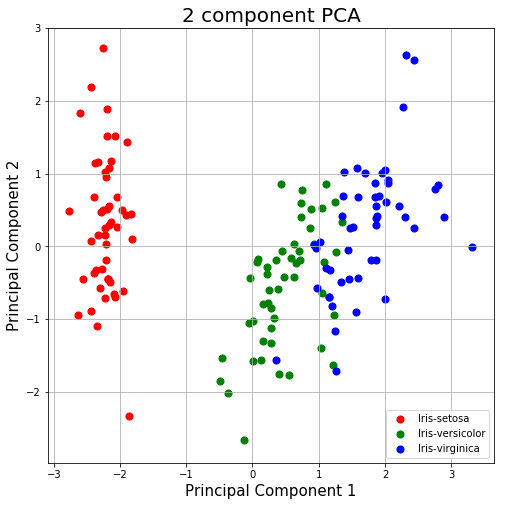

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [9]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

<a id="2"></a> <br>
# 2. PCA to Speed-up Machine Learning Algorithms
One of the most important applications of PCA is for speeding up machine learning algorithms. Using the IRIS dataset would be impractical here as the dataset only has 150 rows and only 4 feature columns. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

[go to top](#top)

In [10]:
# You can add the parameter data_home to wherever to where you want to download your data

# from sklearn.datasets import get_data_home
# print(get_data_home())

mnist = fetch_mldata('MNIST original',data_home= 'C:/_Files/MyProjects/ASDS_2/ShallowLearning/PCA_using_Python/data' )

In [11]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

The images that we downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).

In [12]:
mnist.data.shape

(70000, 784)

The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

In [13]:
# These are the labels
mnist.target.shape

(70000,)

## Split Data into Training and Test Sets
Typically the train test split is 80% training and 20% test. In this case, I chose 6/7th of the data to be training and 1/7th of the data to be in the test set.

In [14]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [15]:
print(train_img.shape)

(60000, 784)


In [16]:
print(train_lbl.shape)

(60000,)


In [17]:
print(test_img.shape)

(10000, 784)


In [18]:
print(test_lbl.shape)

(10000,)


In [19]:
before_img = train_img[0]

## Standardizing the Data

In [20]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## Import and Apply PCA
Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [21]:
# Make an instance of the Model
pca = PCA(.95)

Fit PCA on training set. Note: you are fitting PCA on the training set only.

In [22]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.n_components_

330

Apply the mapping (transform) to both the training set and the test set.

In [24]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [25]:
after_img = train_img[0]

## Apply Logistic Regression to the Transformed Data

In [26]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [27]:
start = time.time()
logisticRegr.fit(train_img, train_lbl)
end = time.time()
print(end-start)

36.086726665496826


In [28]:
# Predict for One Observation (image)
# logisticRegr.predict(test_img[0].reshape(1,-1))

In [29]:
# Predict for One Observation (image)
# logisticRegr.predict(test_img[0:10])

In [30]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.92


In [32]:
mnist = fetch_mldata('MNIST original',data_home= 'C:/_Files/MyProjects/ASDS_2/ShallowLearning/PCA_using_Python/data' )
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)
logisticRegr = LogisticRegression(solver = 'lbfgs')
# logisticRegr.fit(train_img, train_lbl)
start = time.time()
logisticRegr.fit(train_img, train_lbl)
end = time.time()
print(end-start)
score = logisticRegr.score(test_img, test_lbl)
print(score)

65.3819968700409
0.9155


In [33]:
pd.DataFrame(data = [[1.00, 784, 80.59, .9155],
                     [.95, 330, 37.52, .92]], 
             columns = ['Variance Retained',
                      'Number of Components', 
                      'Time (seconds)',
                      'Accuracy'])

,Variance Retained,Number of Components,Time (seconds),Accuracy
0,1.00,784,80.59,0.9155
1,0.95,330,37.52,0.9200


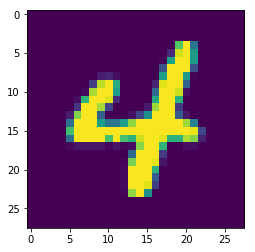

In [34]:
plt.imshow(before_img.reshape(28,28));

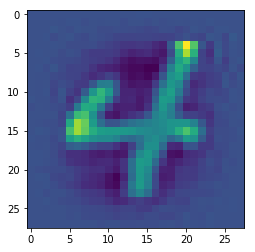

In [35]:
# plt.imshow(after_img.reshape(28,28))
plt.imshow(pca.inverse_transform(after_img).reshape(28,28));